## S-Mobile: Predicting Customer Churn
* Team-lead GitLab id:
* Group name:
* Team member names:

## Setup

Please complete this Jupyter notebook by answering the questions in `s-mobile.pdf` on Canvas (week9/). Create a Notebook and HTML file with all your results and comments and push both the Notebook and HTML file to GitLab when your team is done. All results MUST be reproducible (i.e., the TA and I must be able to recreate the HTML from the Jupyter Notebook file without changes or errors). This means that you should NOT use any python-packages that are not part of the rsm-msba-spark docker container.

This is the fourth group assignment for MGTA 455 and you will be using git and GitLab. If two people edit the same file at the same time you could get what is called a "merge conflict". git will not decide for you who's change to accept so the team-lead will have to determine which edits to use. To avoid merge conflicts, **always** "pull" changes to the repo before you start working on any files. Then, when you are done, save and commit your changes, and then push them to GitLab. Make "pull first" a habit!

In [876]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyrsm as rsm
import statsmodels.formula.api as smf
from sklearn import preprocessing
from statsmodels.genmod.families import Binomial
from statsmodels.genmod.families.links import logit
from sklearn.metrics import roc_auc_score
from clv.clv import clv_calculator

In [877]:
mpl.rcParams["figure.dpi"] = 150

In [878]:
## load the data - this dataset must NOT be changed
s_mobile = pd.read_pickle("data/s_mobile.pkl")
s_mobile["churn_yes"] = (s_mobile["churn"] == "yes").astype(int)

If you want access to the full 5M row dataset, use the dropbox link below.

https://www.dropbox.com/s/eli6a1q6qisacci/s_mobile_1M.pkl?dl=1

The downside to using the dataset with 1M rows is, of course, that estimation time will increase substantially. I do NOT recommend you use this dataset to select your final model or for tuning hyper parameters. You can, however, use this larger dataset to re-estimate your chosen model and generate profit estimates for the representative sample.

In [879]:
# show dataset description
rsm.describe(s_mobile)

## S-mobile

Dataset used to investigate opportunities to decrease customer churn at S-mobile. The sample consists of three parts:

1. A training sample with 27,300 observations and a 50% churn rate ("training == 1")
2. A test sample with 11,700 observations and a 50% churn rate ("training == 0")
3. A representative sample with 30,000 observations and a churn rate of 2%, i.e., the actual monthly churn rate for S-mobile ("is.na(training)" or "representative == 1")

## Variables

* customer: Customer ID
* churn: Did consumer churn in the last 30 days? (yes or no)
* changer: % change in revenue over the most recent 4 month period
* changem: % change in minutes of use over the most recent 4 month period
* revenue: Mean monthly revenue in SGD
* mou: Mean monthly minutes of use
* overage: Mean monthly overage minutes
* roam: Mean number of roaming calls
* conference: Mean number of conference calls
* months: # of months the customer has had service with S-Mobile
* uniqsubs: Number of individuals listed on the customer account
* custcare: Mean number of calls to customer care 
* retcalls: Number of calls by the customer to the retention team
* dropvce: Mean number of dropped voice calls 
* eqpdays: Number of days customer has owned current handset
* refurb: Handset is refurbished (no or yes)
* smartphone: Handset is a smartphone (no or yes)
* creditr: High credit rating as opposed to medium or low (no or yes)
* mcycle: Subscriber owns a motorcycle (no or yes)
* car: Subscriber owns a car (no or yes)
* travel: Subscriber has traveled internationally (no or yes)
* region: Regions delineated by the 5 Community Development Council Districts (e.g., CS is Central Singapore)
* occupation: Categorical variable with 4 occupation levels (professional, student, retired, or other)
* training: 1 for training sample, 0 for test sample, NA for representative sample
* representative: 1 for representative sample, 0 for training and test sample


Use `smf.glm` with `freq_weights` and `cov_type` like in the below example
    
```python
lr = smf.glm(
    formula="churn_yes ~ changer + changem + ...",
    family=Binomial(link=logit()),
    data=pentathlon_nptb.query("training == 1"),
    freq_weights=s_mobile.loc[mobile.training == 1, "cweight"],
).fit(cov_type="HC1")
```

In [880]:
# run python code from another notebook
%run ./sub-notebooks/model1.ipynb

     index     OR   OR%  2.5%  97.5% p.values    
1  changer  1.001  0.1%   1.0  1.002    0.006  **


In [881]:
# importing functions from a module/package
from utils import functions
functions.example()


You just accessed a function from your first python packages!
Change the code in utils/function.py to whatever you need for this assignment
Use 'from utils import functions' to get access to your code
You can add modules to import from by adding additional .py files to the 'utils' directory
Note: If you make changes to the content of this file you will have to restart the notebook kernel to get the updates



## Question answers

### Question 1

#### Exploratory Data Analysis

Descriptive statistics in the training data

In [882]:
pd.get_dummies(
    s_mobile.loc[s_mobile.training == 1, "churn":],
).agg(["mean", "std", "min", "max"]).T

,mean,std,min,max
changer,8.661245,28.956823,-62.0,305.0
changem,15.211392,51.885577,-78.0,521.0
revenue,57.211136,43.258950,0.0,856.0
mou,515.322308,525.458925,0.0,7668.0
overage,66.274286,69.258068,0.0,283.0
roam,1.197253,7.254327,0.0,692.0
conference,0.263480,1.083898,0.0,56.0
months,18.781502,9.595614,6.0,61.0
uniqsubs,1.546227,0.891051,1.0,18.0
custcare,2.288132,4.192970,0.0,32.0


Churn in the representative sample

In [883]:
pd.get_dummies(
    s_mobile.loc[s_mobile.representative == 1, "churn":],
).agg(["mean", "std", "min", "max"]).T

,mean,std,min,max
changer,8.310567,28.496320,-90.0,437.0
changem,17.254533,51.375390,-78.0,540.0
revenue,56.634800,43.339533,0.0,1223.0
mou,540.767067,536.368824,0.0,7359.0
overage,61.723400,67.846131,0.0,265.0
roam,1.187867,10.058579,0.0,1112.0
conference,0.296400,1.284316,0.0,66.0
months,18.592767,9.928488,6.0,61.0
uniqsubs,1.501367,0.840013,1.0,12.0
custcare,2.514533,4.357846,0.0,32.0


In [884]:
s_mobile["churn_yes"] = (s_mobile["churn"] == "yes").astype(int)

In [885]:
class_weight_dict = {0: 49, 1: 1}
s_mobile["cweight"] = rsm.ifelse(s_mobile.churn == "yes", class_weight_dict[1], class_weight_dict[0])

#### Histograms of the variables

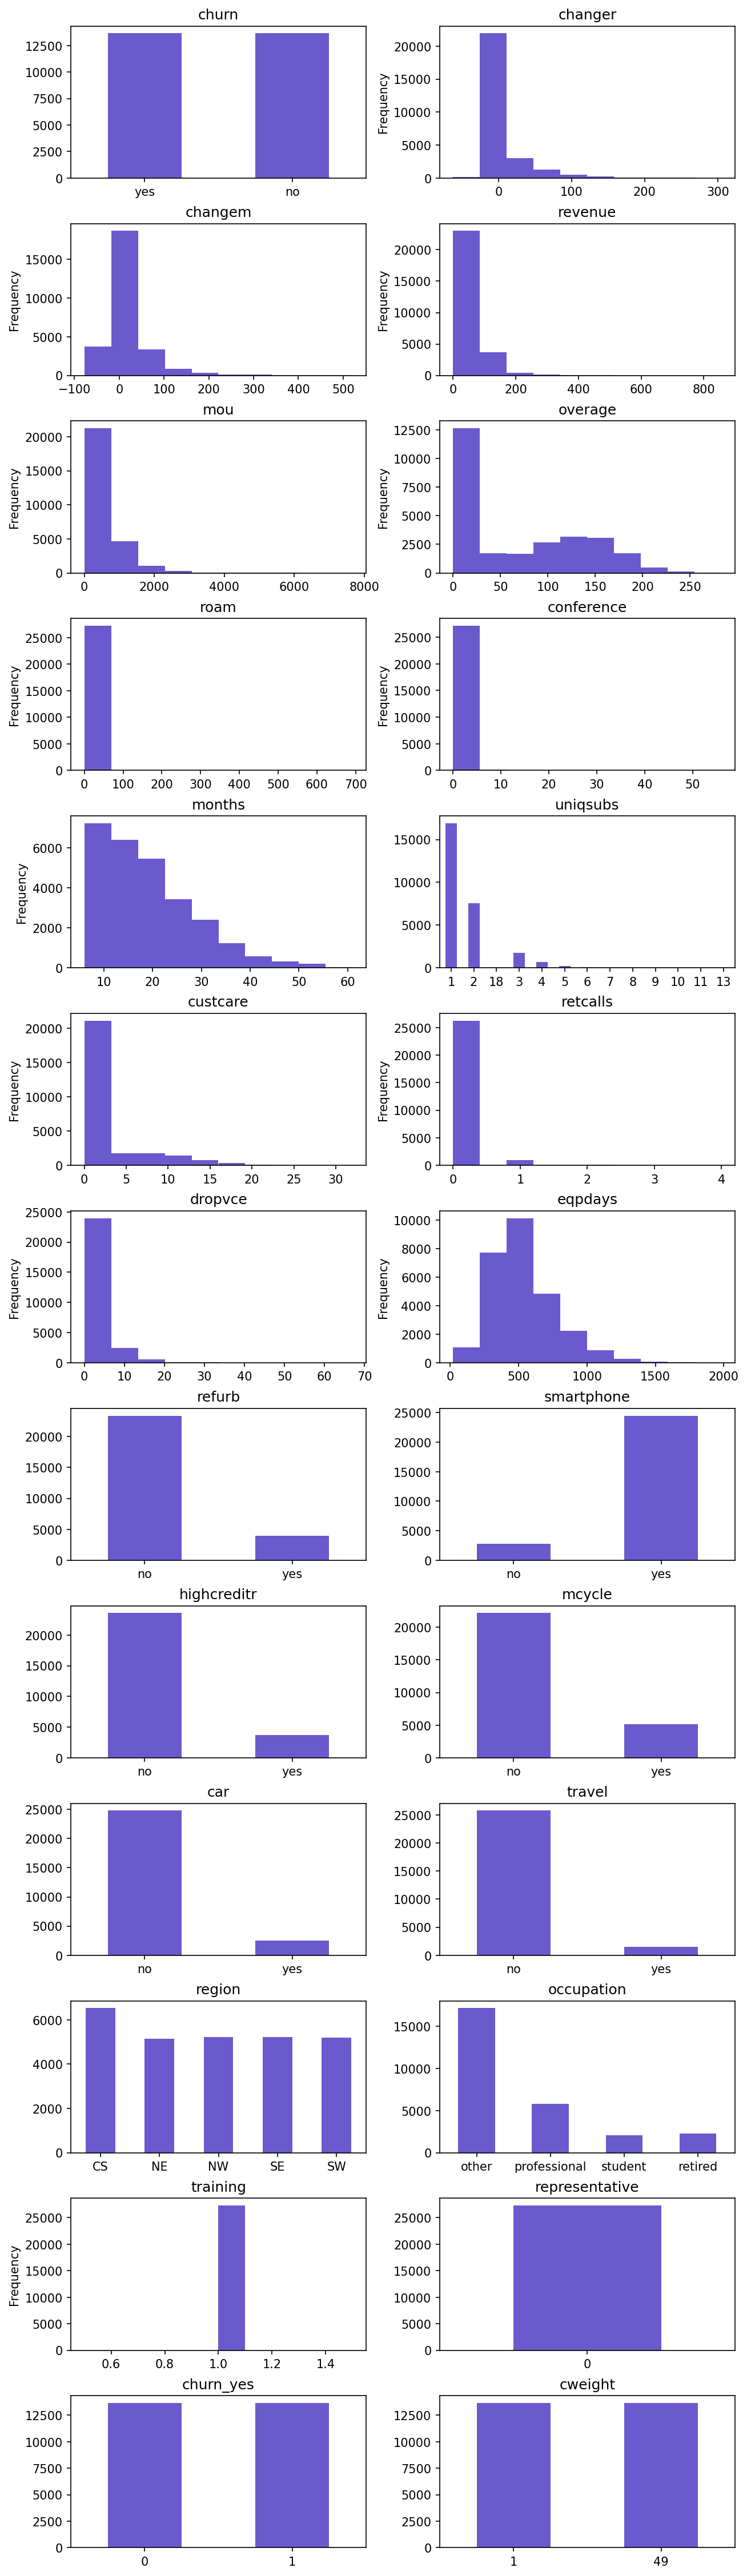

In [886]:
rsm.distr_plot(s_mobile.query('training == 1').drop(columns='customer'))

#### Checking the impact of each variable on churn

In [887]:
ct = rsm.cross_tabs(s_mobile.query('training == 1'),'churn_yes','refurb')
ct.summary()


Cross-tabs
Variables: churn_yes, refurb
Null hyp: there is no association between churn_yes and refurb
Alt. hyp: there is an association between churn_yes and refurb

Observed:

refurb         no    yes   Total
churn_yes                       
0          11,821  1,829  13,650
1          11,558  2,092  13,650
Total      23,379  3,921  27,300

Expected: (row total x column total) / total

refurb           no      yes     Total
churn_yes                             
0          11,689.5  1,960.5  13,650.0
1          11,689.5  1,960.5  13,650.0
Total      23,379.0  3,921.0  27,300.0

Chi-squared: 20.6 df(1), p.value 0.0



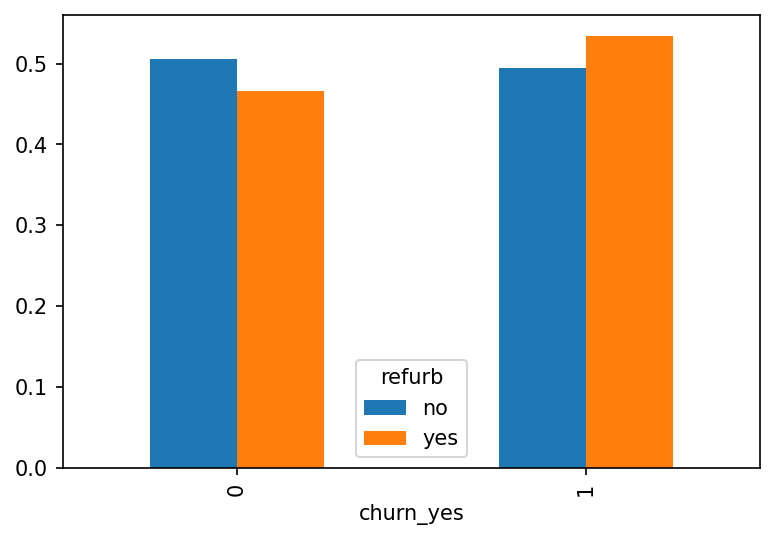

In [888]:
ct.plot()

In [889]:
#Checking the impact of each variable

ct = rsm.cross_tabs(s_mobile.query('training == 1'),'churn_yes','smartphone')
ct.summary()


Cross-tabs
Variables: churn_yes, smartphone
Null hyp: there is no association between churn_yes and smartphone
Alt. hyp: there is an association between churn_yes and smartphone

Observed:

smartphone     no     yes   Total
churn_yes                        
0           1,161  12,489  13,650
1           1,653  11,997  13,650
Total       2,814  24,486  27,300

Expected: (row total x column total) / total

smartphone       no       yes     Total
churn_yes                              
0           1,407.0  12,243.0  13,650.0
1           1,407.0  12,243.0  13,650.0
Total       2,814.0  24,486.0  27,300.0

Chi-squared: 95.91 df(1), p.value 0.0



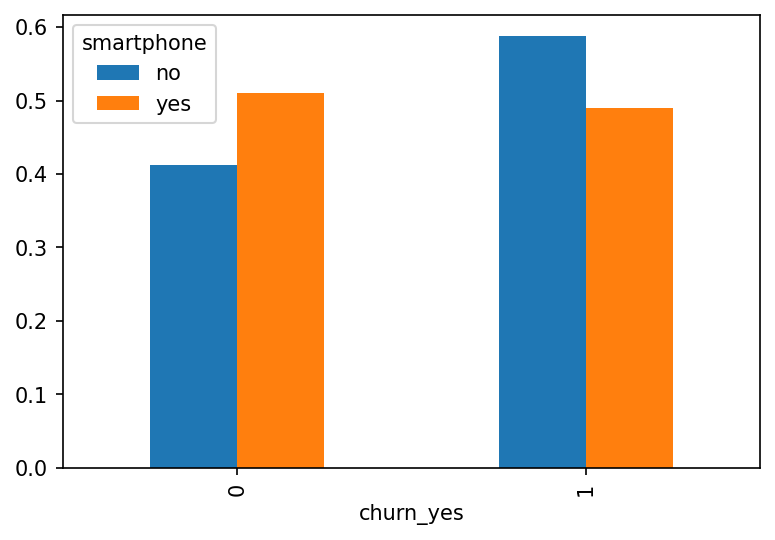

In [890]:
ct.plot()

In [891]:
#Checking the impact of each variable

ct = rsm.cross_tabs(s_mobile.query('training == 1'),'churn_yes','highcreditr')
ct.summary()


Cross-tabs
Variables: churn_yes, highcreditr
Null hyp: there is no association between churn_yes and highcreditr
Alt. hyp: there is an association between churn_yes and highcreditr

Observed:

highcreditr      no    yes   Total
churn_yes                         
0            11,169  2,481  13,650
1            12,394  1,256  13,650
Total        23,563  3,737  27,300

Expected: (row total x column total) / total

highcreditr        no      yes     Total
churn_yes                               
0            11,781.5  1,868.5  13,650.0
1            11,781.5  1,868.5  13,650.0
Total        23,563.0  3,737.0  27,300.0

Chi-squared: 465.24 df(1), p.value 0.0



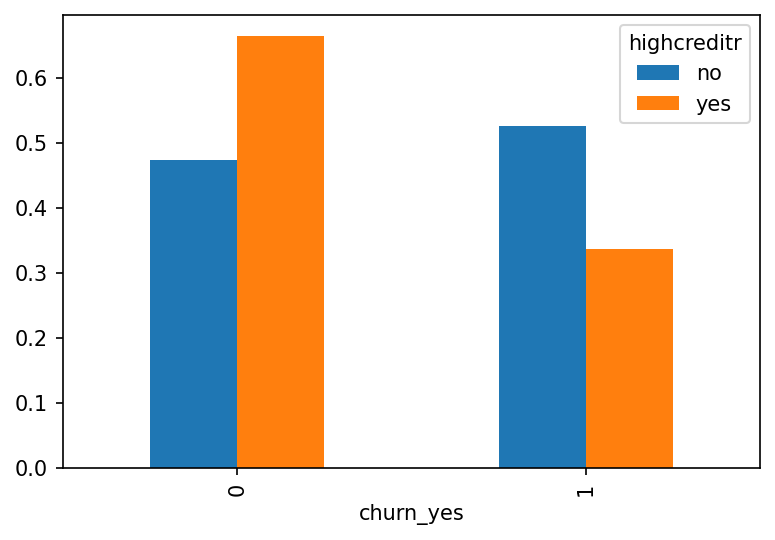

In [892]:
ct.plot()

In [893]:
#Checking the impact of each variable

ct = rsm.cross_tabs(s_mobile.query('training == 1'),'churn_yes','mcycle')
ct.summary()


Cross-tabs
Variables: churn_yes, mcycle
Null hyp: there is no association between churn_yes and mcycle
Alt. hyp: there is an association between churn_yes and mcycle

Observed:

mcycle         no    yes   Total
churn_yes                       
0          11,085  2,565  13,650
1          11,077  2,573  13,650
Total      22,162  5,138  27,300

Expected: (row total x column total) / total

mcycle           no      yes     Total
churn_yes                             
0          11,081.0  2,569.0  13,650.0
1          11,081.0  2,569.0  13,650.0
Total      22,162.0  5,138.0  27,300.0

Chi-squared: 0.02 df(1), p.value 0.9



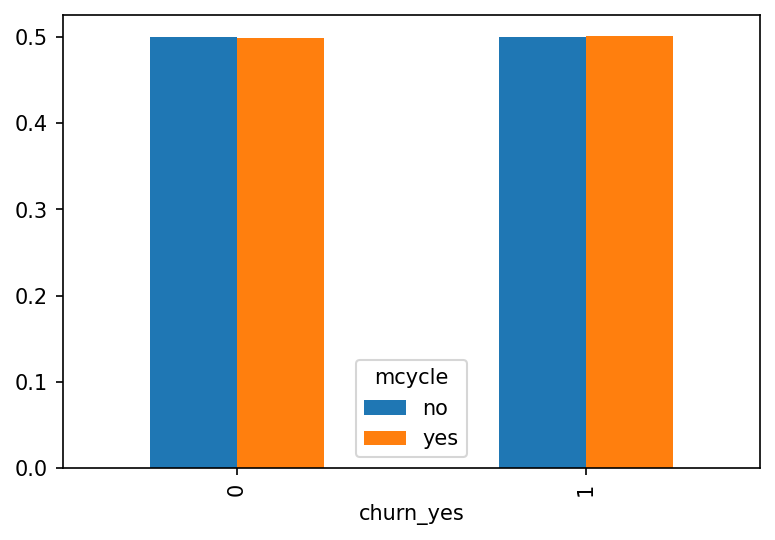

In [894]:
ct.plot()

In [895]:
#Checking the impact of each variable

ct = rsm.cross_tabs(s_mobile.query('training == 1'),'churn_yes','car')
ct.summary()


Cross-tabs
Variables: churn_yes, car
Null hyp: there is no association between churn_yes and car
Alt. hyp: there is an association between churn_yes and car

Observed:

car            no    yes   Total
churn_yes                       
0          12,411  1,239  13,650
1          12,376  1,274  13,650
Total      24,787  2,513  27,300

Expected: (row total x column total) / total

car              no      yes     Total
churn_yes                             
0          12,393.5  1,256.5  13,650.0
1          12,393.5  1,256.5  13,650.0
Total      24,787.0  2,513.0  27,300.0

Chi-squared: 0.54 df(1), p.value 0.46



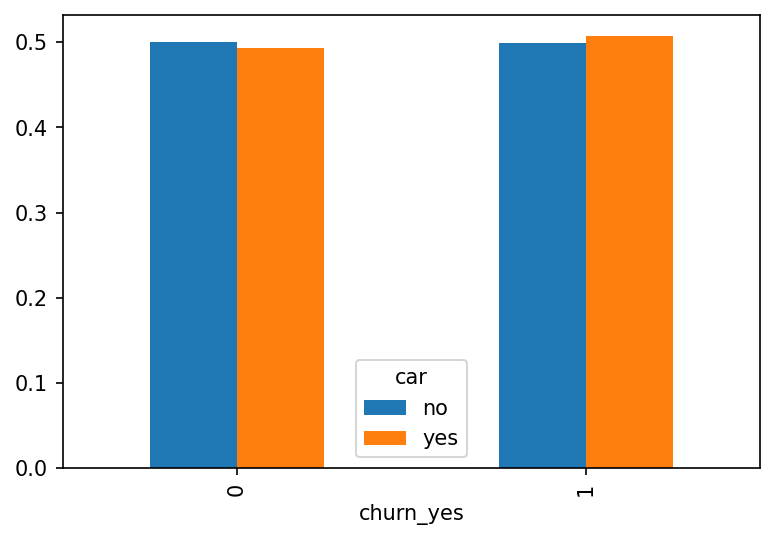

In [896]:
ct.plot()

In [897]:
#Checking the impact of each variable

ct = rsm.cross_tabs(s_mobile.query('training == 1'),'churn_yes','travel')
ct.summary()


Cross-tabs
Variables: churn_yes, travel
Null hyp: there is no association between churn_yes and travel
Alt. hyp: there is an association between churn_yes and travel

Observed:

travel         no    yes   Total
churn_yes                       
0          12,877    773  13,650
1          12,900    750  13,650
Total      25,777  1,523  27,300

Expected: (row total x column total) / total

travel           no      yes     Total
churn_yes                             
0          12,888.5    761.5  13,650.0
1          12,888.5    761.5  13,650.0
Total      25,777.0  1,523.0  27,300.0

Chi-squared: 0.37 df(1), p.value 0.54



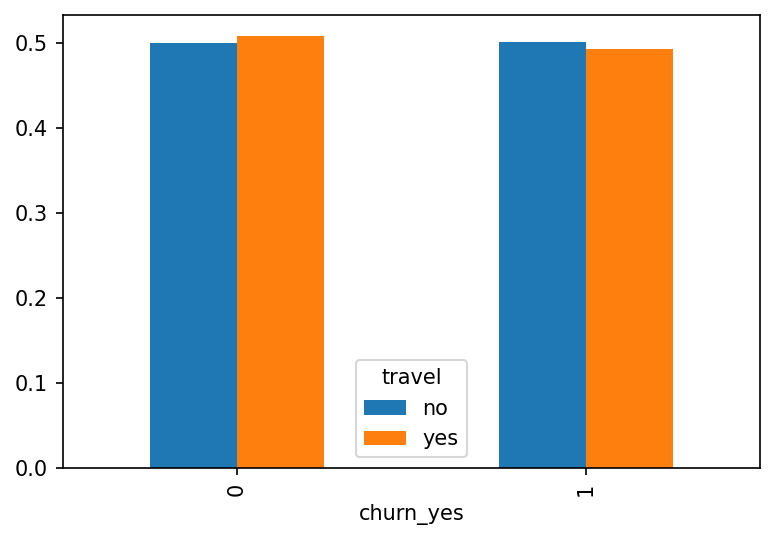

In [898]:
ct.plot()

In [899]:
#Checking the impact of each variable

ct = rsm.cross_tabs(s_mobile.query('training == 1'),'churn_yes','region')
ct.summary()


Cross-tabs
Variables: churn_yes, region
Null hyp: there is no association between churn_yes and region
Alt. hyp: there is an association between churn_yes and region

Observed:

region        CS     NE     NW     SE     SW   Total
churn_yes                                           
0          2,724  2,719  2,723  2,722  2,762  13,650
1          3,803  2,421  2,498  2,504  2,424  13,650
Total      6,527  5,140  5,221  5,226  5,186  27,300

Expected: (row total x column total) / total

region          CS       NE       NW       SE       SW     Total
churn_yes                                                       
0          3,263.5  2,570.0  2,610.5  2,613.0  2,593.0  13,650.0
1          3,263.5  2,570.0  2,610.5  2,613.0  2,593.0  13,650.0
Total      6,527.0  5,140.0  5,221.0  5,226.0  5,186.0  27,300.0

Chi-squared: 236.47 df(4), p.value 0.0



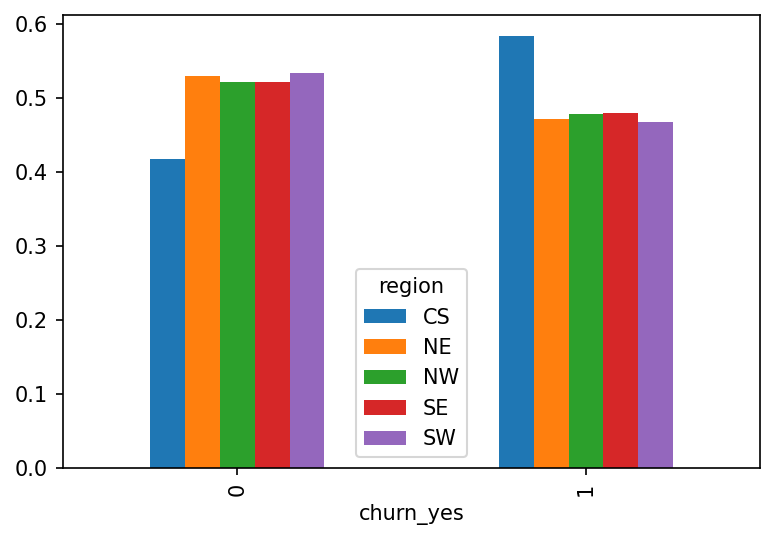

In [900]:
ct.plot()

In [901]:
#Checking the impact of each variable

ct = rsm.cross_tabs(s_mobile.query('training == 1'),'churn_yes','occupation')
ct.summary()


Cross-tabs
Variables: churn_yes, occupation
Null hyp: there is no association between churn_yes and occupation
Alt. hyp: there is an association between churn_yes and occupation

Observed:

occupation   other professional student retired   Total
churn_yes                                              
0            8,650        2,359     734   1,907  13,650
1            8,509        3,431   1,345     365  13,650
Total       17,159        5,790   2,079   2,272  27,300

Expected: (row total x column total) / total

occupation     other professional  student  retired     Total
churn_yes                                                    
0            8,579.5      2,895.0  1,039.5  1,136.0  13,650.0
1            8,579.5      2,895.0  1,039.5  1,136.0  13,650.0
Total       17,159.0      5,790.0  2,079.0  2,272.0  27,300.0

Chi-squared: 1425.75 df(3), p.value 0.0



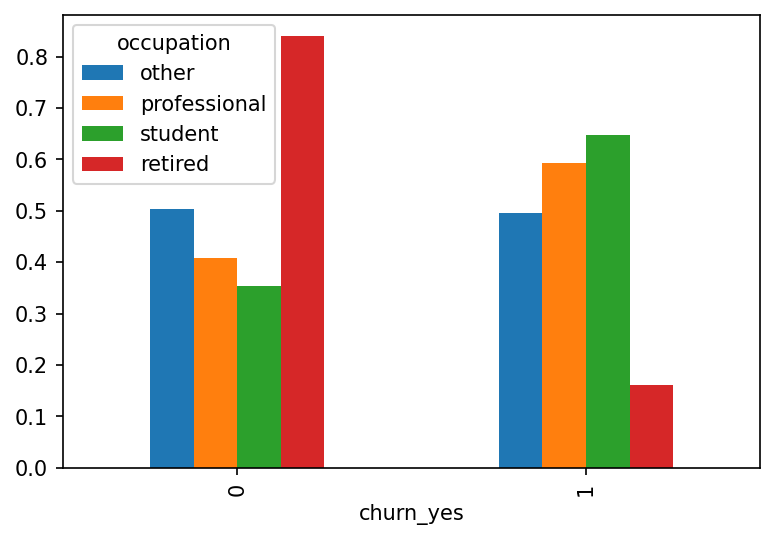

In [902]:
ct.plot()

In [903]:
reg = smf.ols('churn_yes~changer',data=s_mobile.query('training == 1')).fit()

In [904]:
rsm.coef_ci(reg)

,index,coefficient,2.5%,97.5%,p.values,
1,changer,0.0,0.0,0.0,0.006,**


In [905]:
reg = smf.ols('churn_yes~changem',data=s_mobile.query('training == 1')).fit()

In [906]:
rsm.coef_ci(reg)

,index,coefficient,2.5%,97.5%,p.values,
1,changem,-0.0,-0.0,-0.0,< .001,***


In [907]:
reg = smf.ols('churn_yes~revenue',data=s_mobile.query('training == 1')).fit()

In [908]:
rsm.coef_ci(reg)

,index,coefficient,2.5%,97.5%,p.values,
1,revenue,0.0,-0.0,0.0,0.144,


In [909]:
reg = smf.ols('churn_yes~mou',data=s_mobile.query('training == 1')).fit()

In [910]:
rsm.coef_ci(reg)

,index,coefficient,2.5%,97.5%,p.values,
1,mou,-0.0,-0.0,-0.0,< .001,***


In [911]:
reg = smf.ols('churn_yes~overage',data=s_mobile.query('training == 1')).fit()

In [912]:
rsm.coef_ci(reg)

,index,coefficient,2.5%,97.5%,p.values,
1,overage,0.001,0.0,0.001,< .001,***


In [913]:
reg = smf.ols('churn_yes~roam',data=s_mobile.query('training == 1')).fit()

In [914]:
rsm.coef_ci(reg)

,index,coefficient,2.5%,97.5%,p.values,
1,roam,0.001,0.0,0.002,0.002,**


In [915]:
reg = smf.ols('churn_yes~conference',data=s_mobile.query('training == 1')).fit()

In [916]:
rsm.coef_ci(reg)

,index,coefficient,2.5%,97.5%,p.values,
1,conference,-0.011,-0.017,-0.006,< .001,***


In [917]:
reg = smf.ols('churn_yes~months',data=s_mobile.query('training == 1')).fit()

In [918]:
rsm.coef_ci(reg)

,index,coefficient,2.5%,97.5%,p.values,
1,months,0.001,0.001,0.002,< .001,***


In [919]:
reg = smf.ols('churn_yes~uniqsubs',data=s_mobile.query('training == 1')).fit()

In [920]:
rsm.coef_ci(reg)

,index,coefficient,2.5%,97.5%,p.values,
1,uniqsubs,0.016,0.01,0.023,< .001,***


In [921]:
reg = smf.ols('churn_yes~custcare',data=s_mobile.query('training == 1')).fit()

In [922]:
rsm.coef_ci(reg)

,index,coefficient,2.5%,97.5%,p.values,
1,custcare,-0.006,-0.008,-0.005,< .001,***


In [923]:
reg = smf.ols('churn_yes~retcalls',data=s_mobile.query('training == 1')).fit()

In [924]:
rsm.coef_ci(reg)

,index,coefficient,2.5%,97.5%,p.values,
1,retcalls,0.141,0.115,0.168,< .001,***


In [925]:
reg = smf.ols('churn_yes~dropvce',data=s_mobile.query('training == 1')).fit()

In [926]:
rsm.coef_ci(reg)

,index,coefficient,2.5%,97.5%,p.values,
1,dropvce,-0.002,-0.004,-0.001,< .001,***


In [927]:
reg = smf.ols('churn_yes~eqpdays',data=s_mobile.query('training == 1')).fit()

In [928]:
rsm.coef_ci(reg)

,index,coefficient,2.5%,97.5%,p.values,
1,eqpdays,0.0,0.0,0.0,< .001,***


#### Correlations

In [929]:
num_vars = list(s_mobile.dtypes[(s_mobile.dtypes != 'category') & (s_mobile.dtypes != 'object')].reset_index()['index'])[:13]

cor = rsm.correlation(s_mobile.query('training == 1').loc[:,num_vars])
cor.summary()

Correlation
Variables: changer, changem, revenue, mou, overage, roam, conference, months, uniqsubs, custcare, retcalls, dropvce, eqpdays
Null hyp.: variables x and y are not correlated
Alt. hyp.: variables x and y are correlated

Correlation matrix:
           changer changem revenue    mou overage   roam conference months  \
changem       0.43                                                           
revenue       0.12   -0.01                                                   
mou           0.08   -0.06     0.7                                           
overage       0.23    0.02    0.57   0.53                                    
roam          0.03    -0.0    0.27   0.12    0.06                            
conference    0.04   -0.01    0.24   0.33    0.16   0.04                     
months       -0.04   -0.01   -0.02  -0.08   -0.03  -0.02      -0.06          
uniqsubs      -0.0    -0.0   -0.02  -0.04   -0.02  -0.01      -0.02   0.01   
custcare      0.01   -0.05    0.24   0.47    0.2

- After performing an exploratory data analysis, we can see that mcycle, car, travel, and revenue are not statistically significant
- We will however still include these variables in our initial model to see if their significance changes when they are used with the remaining variables

#### Logistic Regression

In [930]:
# Standardising the numerics

Xs = rsm.scale_df(
    s_mobile.loc[:, 'changer':'occupation'],
    wt=s_mobile.cweight,
    train=s_mobile.training == 1,
)
Xs["churn_yes"] = s_mobile.churn_yes
Xs

,changer,changem,revenue,mou,overage,roam,conference,months,uniqsubs,custcare,...,eqpdays,refurb,smartphone,highcreditr,mcycle,car,travel,region,occupation,churn_yes
0,1.795996,0.648059,0.059201,0.051482,0.583946,-0.090861,-0.126390,-0.534447,-0.299926,-0.285786,...,-0.272399,no,yes,no,no,no,no,CS,other,1
1,-0.146109,-0.134122,-0.032648,-0.364217,-0.453367,-0.090861,-0.126390,-0.534447,0.275305,-0.285786,...,-0.288119,no,yes,yes,no,no,no,SE,other,0
2,-0.146109,-0.254458,-0.204864,0.562407,0.252889,-0.090861,0.310452,-0.483883,-0.299926,1.891054,...,-0.602518,no,yes,no,yes,no,yes,NW,professional,0
3,-0.146109,-0.244430,-0.250789,0.014857,-0.453367,-0.090861,-0.126390,0.931900,-0.299926,-0.285786,...,0.172251,no,yes,yes,yes,no,no,NW,retired,0
4,-0.181744,-0.244430,0.495484,1.230822,0.370598,0.675463,-0.126390,0.072318,0.850537,-0.056645,...,-0.299347,no,yes,no,yes,yes,no,SW,other,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68995,-0.146109,-0.314625,-0.273751,-0.453034,-0.453367,-0.090861,-0.126390,0.021754,-0.299926,-0.285786,...,0.399067,no,yes,no,yes,yes,no,SW,other,0
68996,-0.146109,0.788450,-0.308194,-0.426480,-0.453367,-0.090861,-0.126390,-0.028810,0.275305,-0.285786,...,0.354153,no,no,no,yes,yes,no,SE,other,0
68997,-0.146109,-0.114066,-0.158940,-0.268991,-0.063455,-0.090861,-0.126390,0.325136,0.275305,-0.285786,...,0.789820,no,no,no,no,no,no,CS,student,1
68998,-0.199561,-0.455017,-0.181902,-0.234197,-0.453367,-0.090861,-0.126390,0.021754,-0.299926,-0.285786,...,0.372119,no,yes,no,no,no,no,CS,other,1


#### Initial Model

In [931]:
evar = list(pd.Series(Xs.columns)[:-1])

In [932]:
form = "churn_yes ~ " + " + ".join(evar)

In [933]:
lr_b = smf.glm(
    formula=form,
    family=Binomial(link=logit()),
    freq_weights=s_mobile.loc[s_mobile.training == 1, "cweight"],
    data=Xs[s_mobile.training == 1],
)

lr = lr_b.fit(cov_type="HC1")

rsm.or_ci(lr)

,index,OR,OR%,2.5%,97.5%,p.values,
1,refurb[T.yes],1.318,31.8%,1.255,1.385,< .001,***
2,smartphone[T.yes],0.913,-8.7%,0.860,0.969,0.003,**
3,highcreditr[T.yes],0.483,-51.7%,0.455,0.513,< .001,***
4,mcycle[T.yes],0.883,-11.7%,0.834,0.934,< .001,***
5,car[T.yes],0.991,-0.9%,0.919,1.068,0.809,
6,travel[T.yes],0.781,-21.9%,0.723,0.844,< .001,***
7,region[T.NE],0.644,-35.6%,0.611,0.678,< .001,***
8,region[T.NW],0.660,-34.0%,0.627,0.695,< .001,***
9,region[T.SE],0.651,-34.9%,0.618,0.685,< .001,***
10,region[T.SW],0.627,-37.3%,0.595,0.660,< .001,***


In [934]:
rsm.model_fit(lr)


Pseudo R-squared (McFadden): 0.047
Pseudo R-squared (McFadden adjusted): 0.046
Log-likelihood: -63795.467, AIC: 127644.935, BIC: 127953.64
Chi-squared: 691107.451 df(26), p.value < 0.001 
Nr obs: 27,300



In [935]:
lr.wald_test_terms().table.round(3)

,statistic,pvalue,df_constraint
Intercept,10416.621,0.000,1
refurb,121.728,0.000,1
smartphone,8.950,0.003,1
highcreditr,559.722,0.000,1
mcycle,18.519,0.000,1
car,0.058,0.809,1
travel,38.734,0.000,1
region,506.107,0.000,4
occupation,1693.227,0.000,3
changer,11.976,0.001,1


In [936]:
rsm.vif(lr_b)

,variable,vif,Rsq
0,mou,3.139,0.681
1,revenue,2.541,0.606
2,eqpdays,1.677,0.404
3,mcycle[T.yes],1.672,0.402
4,dropvce,1.667,0.400
5,overage,1.653,0.395
6,car[T.yes],1.650,0.394
7,region[T.NW],1.458,0.314
8,region[T.SE],1.457,0.314
9,region[T.SW],1.456,0.313


- In this initial model, the wald test tells us that car, revenue, conference and custcare are statistically insignificant. The p values of these variables in the model is also high
- Hence we will remove these variables one at a time and see if this action changes the odds ratios of the remaining variables by a considerable amount
- The chi-squared p value of these variables is also good, indicating that the variables are good predictors of churn

#### Final Model

In [937]:
evar = list(pd.Series(Xs.columns)[:-1])
evar.remove('car')
evar.remove('revenue')
evar.remove('conference')

In [938]:
form = "churn_yes ~ " + " + ".join(evar)

In [939]:
lr_b = smf.glm(
    formula=form,
    family=Binomial(link=logit()),
    freq_weights=s_mobile.loc[s_mobile.training == 1, "cweight"],
    data=Xs[s_mobile.training == 1],
)

lr = lr_b.fit(cov_type="HC1")

rsm.or_ci(lr)

,index,OR,OR%,2.5%,97.5%,p.values,
1,refurb[T.yes],1.319,31.9%,1.256,1.385,< .001,***
2,smartphone[T.yes],0.913,-8.7%,0.860,0.969,0.003,**
3,highcreditr[T.yes],0.483,-51.7%,0.454,0.513,< .001,***
4,mcycle[T.yes],0.880,-12.0%,0.841,0.920,< .001,***
5,travel[T.yes],0.781,-21.9%,0.723,0.844,< .001,***
6,region[T.NE],0.645,-35.5%,0.612,0.679,< .001,***
7,region[T.NW],0.661,-33.9%,0.627,0.695,< .001,***
8,region[T.SE],0.651,-34.9%,0.618,0.685,< .001,***
9,region[T.SW],0.627,-37.3%,0.596,0.661,< .001,***
10,occupation[T.professional],1.415,41.5%,1.354,1.479,< .001,***


In [940]:
rsm.model_fit(lr)


Pseudo R-squared (McFadden): 0.047
Pseudo R-squared (McFadden adjusted): 0.046
Log-likelihood: -63798.075, AIC: 127644.15, BIC: 127918.554
Chi-squared: 690912.889 df(23), p.value < 0.001 
Nr obs: 27,300



In [941]:
lr.wald_test_terms().table.round(3)

,statistic,pvalue,df_constraint
Intercept,10453.691,0.000,1
refurb,122.230,0.000,1
smartphone,8.915,0.003,1
highcreditr,562.438,0.000,1
mcycle,31.349,0.000,1
travel,38.790,0.000,1
region,505.305,0.000,4
occupation,1701.675,0.000,3
changer,11.988,0.001,1
changem,40.330,0.000,1


In [942]:
rsm.vif(lr_b)

,variable,vif,Rsq
0,mou,2.284,0.562
1,eqpdays,1.674,0.402
2,dropvce,1.638,0.389
3,overage,1.473,0.321
4,region[T.NW],1.458,0.314
5,region[T.SE],1.457,0.314
6,region[T.SW],1.455,0.313
7,region[T.NE],1.453,0.312
8,months,1.362,0.266
9,custcare,1.361,0.265


In [943]:
score = roc_auc_score(s_mobile.query('training==1')['churn_yes'],lr.predict(Xs[s_mobile.training == 1]))

print(f'Train data auc is {score}')

Train data auc is 0.6879414778140053


In [944]:
score = roc_auc_score(s_mobile.query('training==0')['churn_yes'],lr.predict(Xs[s_mobile.training == 0]))

print(f'Test data auc is {score}')

Test data auc is 0.6945277814303455


In [945]:
# Comparing gains on train and test

In [946]:
df_train = pd.DataFrame({'churn_yes':s_mobile.query('training==1')['churn_yes'],'predictions':lr.predict(Xs[s_mobile.training == 1])})
df_test = pd.DataFrame({'churn_yes':s_mobile.query('training==0')['churn_yes'],'predictions':lr.predict(Xs[s_mobile.training == 0])})

<AxesSubplot:xlabel='Proportion of customers', ylabel='Cumulative gains'>

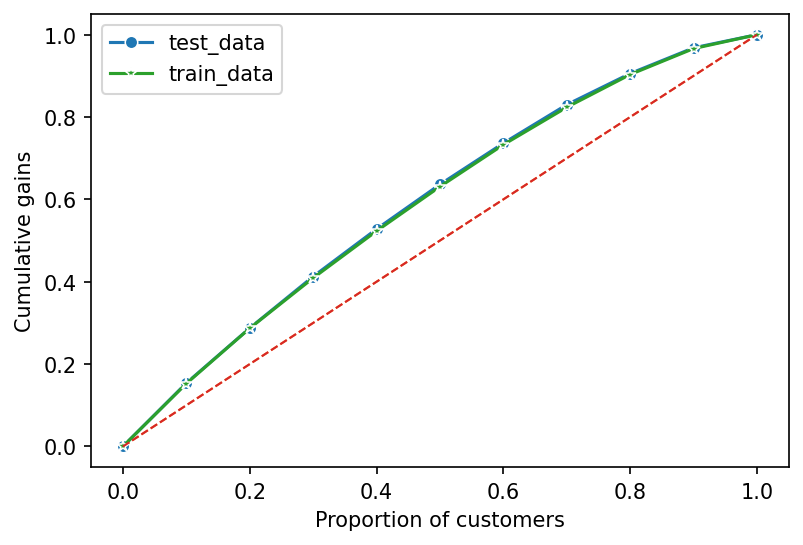

In [947]:
rsm.gains_plot(df=df_test,rvar='churn_yes',lev=1,pred='predictions',label='test_data')
rsm.gains_plot(df=df_train,rvar='churn_yes',lev=1,pred='predictions',label='train_data',marker='*')

- We decided to remove car, revenue and conference to arrive at our final model. The removal of these variables did not change the odds ratios of the remaining variables
- We decided to keep custcare despite it being insignificant because it made intuitive sense. You would expect churn rates to change with changes in the number of custcare calls
- The roc-auc scores of the model on both training and test data are reasonable. There isn't any daylight between the gains curves of the model on both train and test data. Hence there is no overfitting

### Question 2

Importance table

In [948]:
(
    rsm.or_ci(lr, importance=True, data=s_mobile[s_mobile.training == 1])
    .sort_values("importance", ascending=False)
    .reset_index(drop=True)
)

,index,OR,OR%,2.5%,97.5%,p.values,,dummy,importance,wmean,wstd,min,max
0,occupation[T.retired],0.186,-81.4%,0.168,0.207,< .001,***,True,5.372,0.137,0.344,0.0,1.0
1,highcreditr[T.yes],0.483,-51.7%,0.454,0.513,< .001,***,True,2.072,0.180,0.384,0.0,1.0
2,occupation[T.student],1.899,89.9%,1.788,2.018,< .001,***,True,1.899,0.055,0.227,0.0,1.0
3,eqpdays,1.829,82.9%,1.752,1.910,< .001,***,False,1.829,510.298,222.647,22.0,1982.0
4,overage,1.765,76.5%,1.692,1.841,< .001,***,False,1.765,61.625,67.964,0.0,283.0
5,region[T.SW],0.627,-37.3%,0.596,0.661,< .001,***,True,1.594,0.202,0.401,0.0,1.0
6,region[T.NE],0.645,-35.5%,0.612,0.679,< .001,***,True,1.551,0.199,0.399,0.0,1.0
7,region[T.SE],0.651,-34.9%,0.618,0.685,< .001,***,True,1.537,0.199,0.399,0.0,1.0
8,mou,0.656,-34.4%,0.616,0.699,< .001,***,False,1.524,543.775,546.068,0.0,7668.0
9,region[T.NW],0.661,-33.9%,0.627,0.695,< .001,***,True,1.514,0.199,0.399,0.0,1.0


- From the importance leaderboard, we can see that occupation(retired), highcreditr(yes), eqpdays, etc have large effects on the churn rate
- An odds ratio of less than 1 indicates that the churn rate reduces with increase in the explanatory variables whereas an odds ratio of mopre than 1 indicates that the churn rate increases with increase in the explanatory variables
- Despite some variables having high importance, we cannot act on them in the retention stage. Hence we decided to go forward with occupation(student), eqpdays, overage, region(CS) and mou

## Plan 1 - eqpdays

### Question 3

In [949]:
s_mobile_copy = s_mobile[s_mobile.representative == 1].copy(deep = True)
s_mobile_copy['eqp_bin'] = pd.qcut(s_mobile_copy['eqpdays'],20)

s_mobile_copy.groupby(['eqp_bin'])['churn_yes'].mean()

eqp_bin
(12.999, 216.0]    0.009810
(216.0, 253.0]     0.007968
(253.0, 291.0]     0.013495
(291.0, 336.0]     0.013963
(336.0, 360.0]     0.010989
(360.0, 376.0]     0.014189
(376.0, 397.0]     0.015436
(397.0, 418.0]     0.020380
(418.0, 441.0]     0.009162
(441.0, 462.0]     0.020067
(462.0, 487.0]     0.036716
(487.0, 516.0]     0.025316
(516.0, 543.0]     0.027445
(543.0, 579.0]     0.017544
(579.0, 624.0]     0.027554
(624.0, 683.0]     0.029880
(683.0, 748.0]     0.026525
(748.0, 819.1]     0.028302
(819.1, 934.0]     0.017964
(934.0, 1786.0]    0.028056
Name: churn_yes, dtype: float64

- From the calculation above, we can see that the average churn rate of customers is higher than 2% for those customers whose eqpdays is above SGD 547.5 

*NEW PHONE DEAL*
1. We will purchase a large amount of mobile phones from mobile phone companies with a large market share and has a new model out
2. We will then offer a deal to our target customers where we offer this phone in a one year installment plan with zero interest
3. We will also offer our regular plan options with the phone but at a lower price to further encourage them to accept the offer

*Service Cost = SGD 5* 
- SGD 1 for technical development
- SGD 1 for operational training
- SGD 3 for Miscellaneous

### Question 4

In [950]:
lr_b = smf.glm(
    formula=form,
    family=Binomial(link=logit()),
    freq_weights=s_mobile.loc[s_mobile.training == 1, "cweight"],
    data=s_mobile[s_mobile.training == 1],
)

lr = lr_b.fit(cov_type="HC1")

In [951]:
# Estimated churn on representative sample

pred = lr.predict(s_mobile[s_mobile.representative == 1])

In [952]:
s_mobile['predictions'] = pred

In [953]:
# Mean monnthly churn rate for those above average churn in our data
churn = s_mobile[(s_mobile.eqpdays>(1.5*365)) & (s_mobile.representative == 1)].churn_yes.mean()

print(f'The mean monthly churn rate for those with eqpdays above {1.5*365} in the representative data is {round(churn*100,2)}%')

The mean monthly churn rate for those with eqpdays above 547.5 in the representative data is 2.51%


- We assumed that 70% of the customer that are offered the new phone deal will accept the deal
- This deal is offered when a new model is out in the market
- The deal is also offered on that phone which has large market share

In [954]:
# Mean monthly churn rate after setting eqpdays to 0, assuming that only 70% of the target populaton will accept the offer

subset_preds = s_mobile[(s_mobile.eqpdays>(1.5*365)) & (s_mobile.representative == 1)].predictions.copy()
c = lr.predict(s_mobile[(s_mobile.eqpdays>(1.5*365)) & (s_mobile.representative == 1)].sample(frac=0.7, random_state=42).assign(eqpdays=0))
subset_preds[c.index] = c

new_churn = subset_preds.mean()

print(f'The predicted mean monthly churn rate for those with eqpdays above {1.5*365} in the representative data with eqpdays set to 0 is {round(new_churn*100,2)}%')

The predicted mean monthly churn rate for those with eqpdays above 547.5 in the representative data with eqpdays set to 0 is 1.37%


In [955]:
print(f'The projected impact of our plan on churn is a reduction of {round((churn-new_churn)*100,2)}% for this subset of people')

The projected impact of our plan on churn is a reduction of 1.14% for this subset of people


### Question 5

The plan will be targeted only at those customers whose eqpdays is above 547.5

### Question 6

In [956]:
# Mean monthly revenue for customers in this group
rev = s_mobile[(s_mobile.eqpdays>(1.5*365)) & (s_mobile.representative == 1)].revenue.mean()

In [957]:
ser_cost = 5

In [958]:
# Assuming that the incentive costs are 0.

clv_old = clv_calculator(rev,ser_cost,churn)
clv_old

1102.131548263913

In [959]:
clv_new = clv_calculator(rev,ser_cost,new_churn)
clv_new

1417.5590346245153

In [960]:
diff = clv_new - clv_old

print(f'We can spend atmost SGD {round(diff,2)} per customer for the incentive today without incurring a loss')

We can spend atmost SGD 315.43 per customer for the incentive today without incurring a loss


In [961]:
# Present value of the installment plan

payment = np.repeat(999/12,12)
dis = np.arange(1,13,1)
mdr = ((1+0.1)**(1/12))-1
pv = payment/((1+mdr)**dis)

installment_value = pv.sum()
mobile_cost = 999

print(f'Offering the new mobile phone on the installment plan would cost us SGD {round(mobile_cost - installment_value,2)} per customer')
print('P.S: You can expect a phone to cost less when bought in bulk')

Offering the new mobile phone on the installment plan would cost us SGD 49.91 per customer
P.S: You can expect a phone to cost less when bought in bulk


In [962]:
# Finding maximum recurring incentive cost

inc_cost = []

for i in np.arange(1,20,0.001):
    clv = clv_old
    
    if abs(clv_calculator(rev,ser_cost,new_churn, inc_cost=i)-(mobile_cost - installment_value)-clv) < 0.02:
        inc_cost.append(i)

max_inc_cost = np.mean(inc_cost)

print(f'Maximum discount that we can offer per month per customer on this incentive plan is SGD {round(max_inc_cost,2)}')

Maximum discount that we can offer per month per customer on this incentive plan is SGD 7.83


We shall hence offer SGD 3 discount on the plan offered with the new phone.

*Incentive Cost per customer*
- SGD 3 Discount per month
- SGD 49.91 for the new phone

In [963]:
clv_new = clv_calculator(rev,ser_cost,new_churn, inc_cost=3) - (mobile_cost - installment_value) 
diff = clv_new - clv_old

In [964]:
conc = pd.DataFrame({'plan':['eqpdays'],'clv_old':[clv_old],'clv_new':[clv_new],'clv difference':[diff]})

In [965]:
conc.sort_values('clv difference', ascending=False)

,plan,clv_old,clv_new,clv difference
0,eqpdays,1102.131548,1265.986505,163.854957


## Plan 2 - region(CS)

### Question 3

- From our importance plots, we can see that CS region has the highest probability of churn

*CS REGION NETWORK EXPANSION*
1. We suspect that the churn in this region is high because the network coverage in this region is low
2. We will hence expand our network  by installing new cell phone towers (mostly on top of buildings as the CS region will most probably be a city area)
3. We will install as many towers that will bring us close to the network coverage we offer in the SW region
4. Our costs for installing new towers will also include lease costs

*Service Cost = SGD 5* 
- SGD 1 for technical development
- SGD 1 for operational training
- SGD 3 for Miscellaneous

### Question 4

In [966]:
# Mean monnthly churn rate for those above average churn in our data
churn = s_mobile.loc[(s_mobile.region == 'CS') & (s_mobile.representative == 1)].churn_yes.mean()

print(f'The mean monthly churn rate for those not in the SW region in the representative data is {round(churn*100,2)}%')

The mean monthly churn rate for those not in the SW region in the representative data is 2.83%


In [967]:
# Mean monthly churn rate after setting eqpdays to 0

new_churn = lr.predict(s_mobile.loc[(s_mobile.region == 'CS') & (s_mobile.representative == 1)].assign(region='SW')).mean()

print(f'The predicted mean monthly churn rate for those whose region has been simulated to look like the SW region in the representative data is {round(new_churn*100,2)}%')

The predicted mean monthly churn rate for those whose region has been simulated to look like the SW region in the representative data is 1.73%


In [968]:
print(f'The projected impact of our plan on churn is a reduction of {round((churn-new_churn)*100,2)}% for this subset of people')

The projected impact of our plan on churn is a reduction of 1.1% for this subset of people


### Question 5

-  We will install new cell phone towers only in the CS region

### Question 6

In [969]:
# Mean monnthly revenue for customers in this group
rev = s_mobile.loc[(s_mobile.region == 'CS') & (s_mobile.representative == 1)].revenue.mean()

In [970]:
ser_cost = 5

In [971]:
clv_old = clv_calculator(rev,ser_cost,churn)
clv_old

1261.9996971948126

In [972]:
clv_new = clv_calculator(rev,ser_cost,new_churn)
clv_new

1592.6300374326063

In [973]:
diff = clv_new - clv_old

print(f'We can spend atmost SGD {round(diff,2)} per customer for the plan today without incurring a loss')

We can spend atmost SGD 330.63 per customer for the plan today without incurring a loss


In [974]:
target_perc = s_mobile.loc[(s_mobile.region == 'CS') & (s_mobile.representative == 1)].shape[0] / s_mobile.loc[s_mobile.representative == 1].shape[0]

In [975]:
max_spend = target_perc * 1000000 * diff

print(f'We have SGD {round(max_spend,2)} to spend on cell phone towers to expand the network in the CS region')

We have SGD 65872584.79 to spend on cell phone towers to expand the network in the CS region


In [976]:
# Present value of the land lease

payment = np.repeat(2000,60)
dis = np.arange(0,60,1)
mdr = ((1+0.1)**(1/12))-1
pv = payment/((1+mdr)**dis)

lease_value = pv.sum()

print(f'Leasing land will cost SGD {round(lease_value,2)} per tower')

Leasing land will cost SGD 95835.16 per tower


Each tower costs around 250000 SGD to install. Leasing land (or spots on top of buildings) will cost us SGD 95835.16 

In [977]:
fixed_install_cost = 20*(250000/(target_perc * 1000000))

In [978]:
lease_per_cust = 20*(2000/(target_perc * 1000000))

*Incentive Cost per customer*
- SGD 0.2 per month for the lease
- SGD 25.09 fixed initial installation cost

In [979]:
clv_new = clv_calculator(rev,ser_cost,new_churn, inc_cost=lease_per_cust) - fixed_install_cost
diff = clv_new - clv_old

In [980]:
conc_2 = pd.DataFrame({'plan':['region(CS)'],'clv_old':[clv_old],'clv_new':[clv_new],'clv difference':[diff]})

In [981]:
conc = conc.append(conc_2)
conc.sort_values('clv difference', ascending=False)

,plan,clv_old,clv_new,clv difference
0,region(CS),1261.999697,1561.271056,299.271359
0,eqpdays,1102.131548,1265.986505,163.854957


## Plan 3 - overage

### Quesion 3

**Understanding the pattern of average spending, minutes of usages and overages**

In [982]:
#Analysis to understand average spending for users who do not have overtime
no_overage_rev= s_mobile.query('overage==0 & training==1')['revenue'].mean()
no_overage_mins= s_mobile.query('overage==0 & training==1')['mou'].mean()
print(f"Users with no overage have mean mou as {round(no_overage_mins,2)} with a total revenue around SGD {round(no_overage_rev,2)} per month")

Users with no overage have mean mou as 290.22 with a total revenue around SGD 41.37 per month


In [983]:
#Analysis to understand average spending for users who have overtime
overage_rev= s_mobile.query('overage>0 & training==1')['revenue'].mean()
total_mins= s_mobile.query('overage>0 & training==1')['mou'].mean()
overage_mins= s_mobile.query('overage>0 & training==1')['overage'].mean()
print(f"Users who have overage have mean mou as {round(total_mins,2)} and overage as {round(overage_mins,2)} with a total revenue around SGD {round(overage_rev,2)} per month")

Users who have overage have mean mou as 670.19 and overage as 111.87 with a total revenue around SGD 68.11 per month


In [984]:
#Difference in average revenues for users with and without overage
diff_revenue= overage_rev- no_overage_rev
print(f"The difference in average revenue between overages and no overages is {round(diff_revenue,2)}")

The difference in average revenue between overages and no overages is 26.74


In [985]:
#We create different bins to check the cut-off point for overage minutes that we need to contact
s_mobile_copy = s_mobile.query('representative == 1 & overage>0').copy(deep = True)
s_mobile_copy['overage_bin'] = pd.qcut(s_mobile_copy['overage'],20)
s_mobile_copy.groupby(['overage_bin'])['churn_yes'].mean()

overage_bin
(0.999, 19.0]     0.033970
(19.0, 40.0]      0.050139
(40.0, 58.0]      0.042303
(58.0, 70.0]      0.019157
(70.0, 81.0]      0.023171
(81.0, 90.0]      0.017456
(90.0, 98.0]      0.021767
(98.0, 106.0]     0.020690
(106.0, 113.0]    0.030750
(113.0, 119.0]    0.023136
(119.0, 125.0]    0.013716
(125.0, 132.0]    0.013889
(132.0, 138.0]    0.021739
(138.0, 144.0]    0.020434
(144.0, 151.0]    0.013699
(151.0, 157.0]    0.027778
(157.0, 165.0]    0.018029
(165.0, 175.0]    0.023199
(175.0, 189.0]    0.023544
(189.0, 265.0]    0.031888
Name: churn_yes, dtype: float64

Customers with overage minutes have churn rate higher than 2%. Therefore, we will contact all these users in our offer. Currently, the average revenue from users who do not have overage is 41.3 and for the ones who have overage is 68.1

*OVERAGE REDUCTION PLAN*
1. This plan will target all customers who have overages i.e overages>0 in our dataset
2. The plan will cover an additional 100 minutes above the current plan for every user. The reason we chose 100 minutes is because average overage minutes around 111 minutes and we have taken a value slightly lower than that
3. Currently, difference in revenues between overages(SGD 68) and non-overages(SGD 41) is SGD 27. We will only charge 2/3rd of this to the customers i.e SGD 18. Thus, the plan will cost SGD (41+18)= SGD 59
4. As an additional incentive, we will also provide additional internet plans

### Question 4

In [986]:
# impact of eliminating overage on churn probability
smobile_rep = s_mobile.query("representative == 1").copy()
smobile_rep["p_overage0"] = lr.predict(s_mobile[s_mobile.representative == 1].assign(overage=0))
comparison= smobile_rep.loc[smobile_rep.overage > 0, ["churn_yes", "p_overage0"]].agg(
    ["count", "mean"]
).round(4)
comparison

,churn_yes,p_overage0
count,16264.0000,16264.000
mean,0.0243,0.014


### Question 5

The plan will be targeted to all customers who have overages i.e overage>0

### Question 6

In [987]:
#Churn variables from previous calculation
old_churn= comparison.iloc[1,0]
new_churn= comparison.iloc[1,1]

In [988]:
#Old CLV
rev= s_mobile.query('overage>0')['revenue'].mean()
incentive_cost= 0
ser_cost=5
old_clv= clv_calculator(rev,ser_cost,old_churn,inc_cost= incentive_cost)

In [989]:
# Finding maximum recurring incentive cost
inc_cost = []

for i in np.arange(1,20,0.001):
    if abs(clv_calculator(rev,ser_cost,new_churn, inc_cost=i)-old_clv) < 0.02:
        inc_cost.append(i)

max_inc_cost = np.mean(inc_cost)

print(f'Maximum discount that we can offer per month per customer on this plan is {round(max_inc_cost,2)} SGD')

Maximum discount that we can offer per month per customer on this plan is 12.95 SGD


In [990]:
incentive_cost= (diff_revenue)/3
incentive_cost

8.911753554687246

We plan to give a discount of SGD 9 per month which is lower than the maximum discount we can offer to break-even with old CLV

*Incentive Cost per customer*
- SGD 9 per month discount

In [991]:
#New CLV
rev= s_mobile.query('overage>0')['revenue'].mean()
serv_cost=5
new_clv= clv_calculator(rev,ser_cost,inc_cost= incentive_cost, churn= new_churn)

In [992]:
diff = new_clv - old_clv

print(f'We can spend atmost {round(diff,2)} SGD per customer for the incentive plan without incurring a loss')

We can spend atmost 135.8 SGD per customer for the incentive plan without incurring a loss


In [993]:
conc_3 = pd.DataFrame({'plan':['overage'],'clv_old':[old_clv],'clv_new':[new_clv],'clv difference':[diff]})

In [994]:
conc = conc.append(conc_3)
conc.sort_values('clv difference', ascending=False)

,plan,clv_old,clv_new,clv difference
0,region(CS),1261.999697,1561.271056,299.271359
0,eqpdays,1102.131548,1265.986505,163.854957
0,overage,1704.909352,1840.705131,135.795779


## Plan - 4 - occupation(student)

### Question 3

After looking at average revenues for different occupation categories, we found that student pay much higher than professionals and retired. Hence, we suspect that the students pay prices that are higher than they can afford which is why they have high churn rates. We plan to give them some student discount to lower their financial burden. After running a randomized controlled trial we found that the churn rate lowers to that of professionals.  <br><br>
*STUDENT DISCOUNT PLAN* <br>
Student can go to student discount website and verify their identity using their college ID cards and .edu email ID. We can partner with companies like SheerID or Unidays to do this. Once the identity is verified, the student will receive a coupon code which can be applied at the website or store they are purchasing the plan from to get a discount. <br>


*Service Cost per Student = SGD 5* 
- SGD 1 for technical development
- SGD 1 for operational training
- SGD 3 for Miscellaneous

In [995]:
s_mobile[s_mobile.representative == 1].groupby('occupation')['revenue'].mean()

occupation
other           61.790678
professional    51.852151
student         56.229141
retired         39.556346
Name: revenue, dtype: float64

Here we see that the student's have second highest average monthly revenue

### Question 4
* The current churn rate for student subscribers is 4.17% and after the discount it will reduce by 1.45%.
* Elaborating on the experiment, we divided the student subscribers into two randomized groups and gave a SGD 8 discount to one of the groups and found that the churn rates decreased and is closer to the overall churn rate of the professionals.

In [996]:
# Mean monnthly churn rate for those above average churn in our data
student_churn = s_mobile.loc[(s_mobile.occupation== 'student') & (s_mobile.representative == 1)].churn_yes.mean()
print(f'The mean monthly churn rate for students in the representative data is {round(student_churn*100,2)}%')

The mean monthly churn rate for students in the representative data is 4.17%


In [997]:
# Mean monthly churn rate after setting occupation of students to professional

new_churn = lr.predict(s_mobile.loc[(s_mobile.occupation == 'student') & (s_mobile.representative == 1)].assign(occupation='professional')).mean()

print(f'The mean monthly churn rate for students whose occupation has been simulated to look like the Professionals in the representative data is {round(new_churn*100,2)}%')

The mean monthly churn rate for students whose occupation has been simulated to look like the Professionals in the representative data is 2.72%


In [998]:
print(f'The projected impact of our plan on churn is a reduction of {round((student_churn-new_churn)*100,2)}% for this subset of people')

The projected impact of our plan on churn is a reduction of 1.45% for this subset of people


### Question 5
The plan is purely targeted to the students subscribers. (i.e. 'student' level in the occupation variable). The motivation to do this is that we see a significantly higher churn rate in the student subscribers and we suspect that it is because the prices of plans are little higher for them. Also, the average revenue of the students is higher than retired and professionals, hence any change in churn rate of the students will be extremely profitable for the company

### Question 6

In [999]:
rev = s_mobile.loc[(s_mobile.occupation == 'student') & (s_mobile.representative == 1)].revenue.mean()
ser_cost = 5
clv_old = clv_calculator(rev,ser_cost,student_churn)
clv_old

989.1274354362118

In [1000]:
clv_new = clv_calculator(rev,ser_cost,new_churn)
clv_new

1293.5710819460874

In [1001]:
diff = clv_new - clv_old

print(f'We can spend atmost {round(diff,2)} SGD per customer for the incentive today without incurring a loss')

We can spend atmost 304.44 SGD per customer for the incentive today without incurring a loss


*Incentive Cost*
- SGD 5 Discount
- SGD 1 Partnership with Unidays/SheerID

In [1002]:
clv_new = clv_calculator(rev,ser_cost,new_churn, inc_cost=6)
diff = clv_new-clv_old

In [1003]:
conc_4 = pd.DataFrame({'plan':['occupation(student)'],'clv_old':[clv_old],'clv_new':[clv_new],'clv difference':[diff]})

In [1004]:
conc = conc.append(conc_4)
conc.sort_values('clv difference', ascending=False)

,plan,clv_old,clv_new,clv difference
0,region(CS),1261.999697,1561.271056,299.271359
0,eqpdays,1102.131548,1265.986505,163.854957
0,occupation(student),989.127435,1142.066952,152.939517
0,overage,1704.909352,1840.705131,135.795779


## Plan 5 - mou

### Question 3

In [1005]:
s_mobile_rep = s_mobile.query("representative == 1").copy()


In [1006]:
s_mobile_rep.mou.agg(["mean", "std", "min", "max"])

mean     540.767067
std      536.368824
min        0.000000
max     7359.000000
Name: mou, dtype: float64

In [1007]:
s_mobile_rep['mou_bars'] = pd.qcut(s_mobile_rep['mou'],10)

s_mobile_rep.groupby(['mou_bars'])['churn_yes'].mean()

mou_bars
(-0.001, 61.0]      0.028249
(61.0, 132.0]       0.025734
(132.0, 206.0]      0.024048
(206.0, 285.0]      0.019852
(285.0, 378.0]      0.018543
(378.0, 490.0]      0.017126
(490.0, 642.0]      0.019346
(642.0, 862.0]      0.016944
(862.0, 1231.0]     0.016388
(1231.0, 7359.0]    0.013676
Name: churn_yes, dtype: float64

- As we can observe in our importance table, MOU(mean montly minutes of usage) is a big contributor to churn. With one unit increase in MOU, odds of someone churning decreases by a factor of 0.656 or by 34.4%, holding all else constant
- Hence our objective is to increase MOU for our customers and consequently reducing churn
- As we can see in the above table, customers with MOU less than 200 have over 2% of churn. Hence,we only target customers with mou<200

*MOU IMPROVEMENT PLAN*
1. For customers with mou<200, we assume that by giving discounts on their plan and providing free additional minutes, they will tend to use our service more which will increase mou
2. We will assume that their mou will increase to the average mou for the representative data. This will consequently reduce churn.
3. Based on our CLV calculation later, we will decide on the appropriate discount

### Question 4

In [1008]:
s_mobile_rep = s_mobile.query("representative == 1").copy()

In [1009]:
# assigning mou to average mou = 540 to simulate the effect of offering the deal
s_mobile_rep["mou_mean"] = lr.predict(s_mobile[s_mobile.representative == 1].assign(mou=540))

#seeing the difference in churn % before and after the effects of offering the deal. The deal is only offered to customers in representative data whose mou is less than 200
s_mobile_rep.loc[s_mobile_rep.mou < 200, ["churn_yes", "mou_mean"]].agg(
    ["count", "mean"]
).round(4)

,churn_yes,mou_mean
count,8736.000,8736.000
mean,0.026,0.018


### Question 5
We target customers whose mou is less than 200

### Question 6

In [1010]:
# Mean monnthly revenue for customers in this group
rev= s_mobile[(s_mobile.mou<200) & (s_mobile.representative == 1)].revenue.mean()

In [1011]:
rev

31.979281135531135

In [1012]:
ser_cost = 5

In [1013]:
#clv with old churn rate
clv_old = clv_calculator(rev,ser_cost,0.026)
clv_old

698.1376317003111

In [1014]:
#clv with new improved churn rate
clv_new = clv_calculator(rev,ser_cost,0.018)
clv_new

828.3732886869798

In [1015]:
# diff in CLV
diff = clv_new - clv_old

print(f'We can spend atmost {round(diff,2)} SGD per customer for the incentive today without incurring a loss')

We can spend atmost 130.24 SGD per customer for the incentive today without incurring a loss


In [1016]:
# Finding maximum recurring incentive cost

inc_cost = []

for i in np.arange(1,20,0.001):
    clv = clv_old
    
    if abs(clv_calculator(rev,ser_cost,0.018, inc_cost=i)-clv) < 0.02:
        inc_cost.append(i)

max_inc_cost = np.mean(inc_cost)

print(f'Maximum discount that we can offer per month per customer on this incentive plan is {round(max_inc_cost,2)} SGD')

Maximum discount that we can offer per month per customer on this incentive plan is 4.24 SGD


We will offer monthly discount that is 10% of avg revenue for customers in rep data with mou<200 which is approx SGD 3. We will also offer SGD 0.5 worth of free additional minutes (less than the next best plan).That will be equivalent to incurring SGD 3.5 additional charges monthly

*Incentive Cost*
- SGD 3 Discount
- SGD 0.5 worth of additional minutes

In [1017]:
#clv with new improved churn rate
clv_new = clv_calculator(rev,ser_cost,0.018, inc_cost=3.5)
diff = clv_new-clv_old

In [1018]:
conc_5 = pd.DataFrame({'plan':['mou'],'clv_old':[clv_old],'clv_new':[clv_new],'clv difference':[diff]})

In [1019]:
conc = conc.append(conc_5)

## Conclusion

In [1020]:
conc.sort_values('clv difference', ascending=False)

,plan,clv_old,clv_new,clv difference
0,region(CS),1261.999697,1561.271056,299.271359
0,eqpdays,1102.131548,1265.986505,163.854957
0,occupation(student),989.127435,1142.066952,152.939517
0,overage,1704.909352,1840.705131,135.795779
0,mou,698.137632,720.909102,22.771470


- From the table above we can we see that region(CS) plan brings us the most value for money
- the eqpdays and occupation(student) plans are the next best plans in terms of value for money